In [1]:
NotSoFast = Exception("Did you make a prediction before you ran the code?")

#Advanced Image Processing

In this notebook, we will explore some more Python tools for image processing.

First, upload your favorite full moon image from the `class-notes/photos/` folder to your Colab session, using the folder icon ("Files") to the left.

Next, import the Python libraries we will use.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import random as rng		# import random number generator
from scipy.signal import oaconvolve as convolve  # fast convolution function

View the photo ...

(-0.5, 4655.5, 3519.5, -0.5)

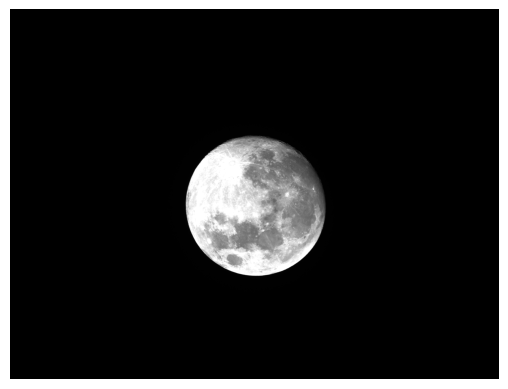

In [3]:
# Set data directory for cat photo.
data_directory = "./"
file_name = "full-moon-10ms.PNG"

# Import the photograph using PyPlot.
photo = plt.imread(data_directory + file_name)

plt.figure()
plt.imshow(photo)
plt.gray()
plt.axis('off')


In [4]:
# Get the dimensions of the image.
Imax, Jmax = photo.shape

In [5]:
# Find bounding box for brightest pixels.
# Set a threshold for the edge of the moon.
threshhold = 0.1

# Use Boolean array: True for "moon pixels"
i_vals, j_vals = np.nonzero(photo > threshhold)

# Search indices for edges of the moon.
i_min = min(i_vals)
i_max = max(i_vals)
j_min = min(j_vals)
j_max = max(j_vals)

# Find the center of the moon.
i_mid = (i_min + i_max) // 2
j_mid = (j_min + j_max) // 2

Text(0.5, 1.0, 'Row 2340')

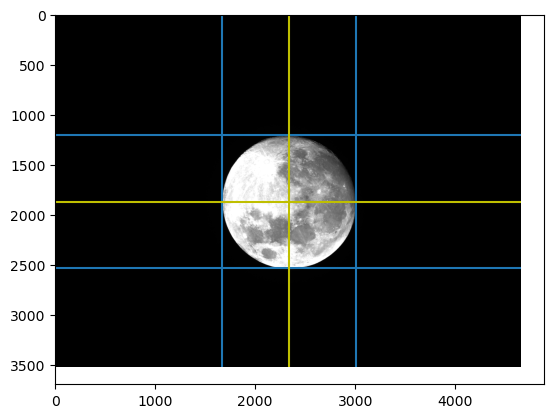

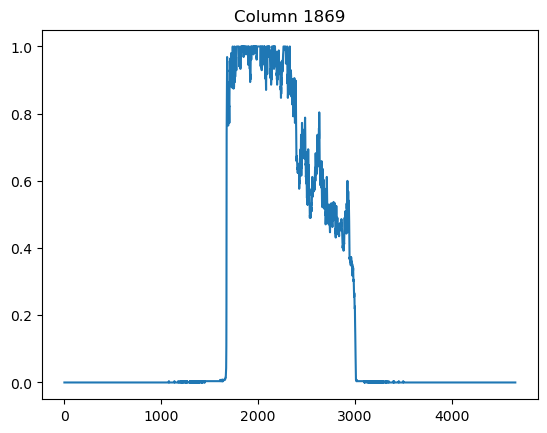

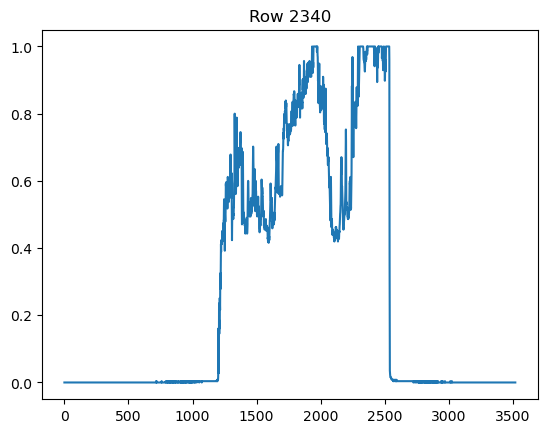

In [6]:
# Plot the moon.
# Verify center and edges.
plt.figure()
plt.imshow(photo)
plt.gray()
plt.vlines([j_min, j_max], 0, Imax)
plt.hlines([i_min, i_max], 0, Jmax)
plt.hlines(i_mid, 0, Jmax, 'y')
plt.vlines(j_mid, 0, Imax, 'y')

# Plot a column of the image.
plt.figure()
plt.plot(photo[i_mid,:])
plt.title("Column %d" % i_mid)

# Plot a row of the image.
plt.figure()
plt.plot(photo[:,j_mid])
plt.title("Row %d" % j_mid)

# Finding Stars

The moon is big and bright.  Stars are small, and dim by comparison.  (The brightest star in the sky, Sirius, has magnitude -1.3. The mangitude of the full moon is -12.6 --- about 33,000 times brighter!)

Maybe we should look in a "moon-free" region.  The image below shows the lower-right rectangle of the moon photograph above.

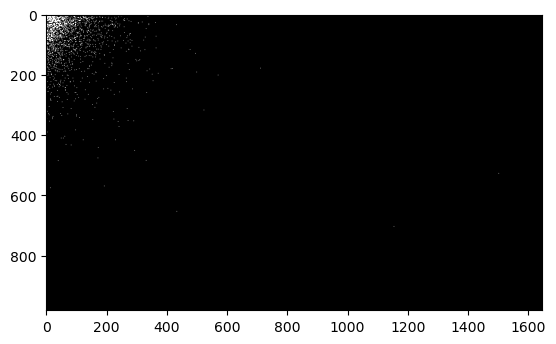

In [7]:
# Look in lower right quadrant.
frame = photo[i_max:,j_max:]
plt.imshow(frame, vmax=0.001)
plt.gray()

Even in this moon-free region, it is difficult to tell if there are any stars.

So how do you find stars in an image like this?  Searching all 16,389,120 pixels is not a good option.  It would be great if we could make the stars stand out against the background ...

This is possible through a process called **convolution**.  Convolution is a rich and fascinating mathematical subject.  For our present purposes, suffice it to say that "convolving" an image with a **filter** replaces each pixel with a weighted average of its neighbors.

## Square Filter

We will start simple.  The filter below will replace each pixel by the sum of all of the pixels in a rectangular region around it.

Run the cell below to create and inspect the filter.

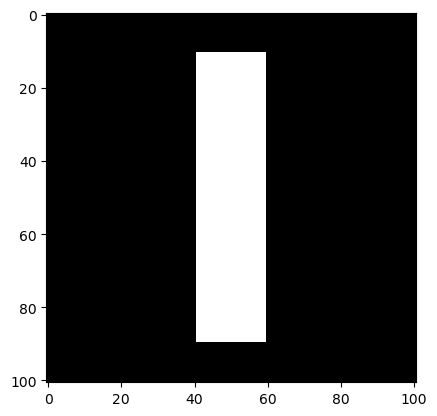

In [8]:
# Create a rectangular filter.
# Add up contributions from all the pixels in a box,
# to try and bring out bright regions.

# Size of filter will be NxN.
N = 101

# This will be the center of the rectangle, in pixels.
x0 = 0
y0 = 0

# This will be the half-width of the rectangle, in pixels.
dx = 10
dy = 40

# Get the pixel indices for the filter.
s = np.arange(N) - N//2

# Make 2D grids of x and y values.
X,Y = np.meshgrid(s,s)

# Make Z the bell curve filter.

# Create the filter.
square_filter = (X > x0-dx) * (X < x0+dx) * (Y > y0-dy) * (Y < y0+dy)

# View the filter.
plt.imshow(square_filter)

-----

## Your Turn

- Change the values of `x0` and `y0`.  What happens?
- Change the values of `dx` and `dy`.  What happens?
- If you replace each pixel by the sum of all the pixels in a rectangular region around it, what do you think the resulting image will look like?

1) Changing these values recenters the rectangle. - goes left + goes right
2) This changing the radius of the rectangle. (a half-rectangle)
3) I think it change the brightness intensity of the image, bringing out all the bright regions

When you are ready to move on, make the filter a 40x40 square centered on (0,0).  Then run the following cell.

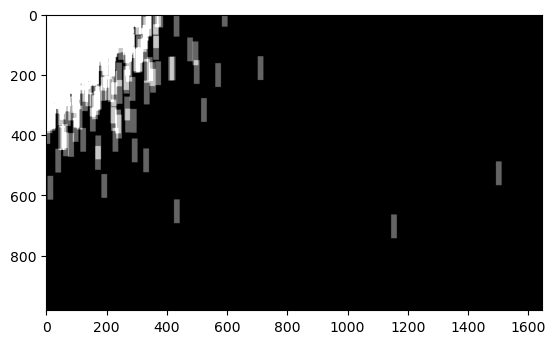

In [9]:
# Comment or delete the next line to run the cell.
#raise(NotSoFast)

# Apply the filter.
convolution = convolve(frame, square_filter, mode='same')

# View the filtered image.
threshold = 0.01
plt.imshow(convolution, vmax=threshold)
plt.gray()

- Describe the image after convolution.
- What do you think the thing in the upper left corner is?
- Do you see the stars now?  Where?

The image is mostly dark with a cluster of white cubes in the upper left corner
I think the thing in the corner is likely an artifact from the moon
I see what are likely sars scattered around the image. There seem to be around 10

- Change the code above to make the rectangle of the filter larger, and then run the cells again.  What happens to the image?
- Change the code above to make a long, skinny rectangle, and then run the cells again.  What happens to the image?

The size of the blobs is all that changes for both. The image either gets rectangles or larger squares respectively.

-----

These are six regions that Dr. Kinder identified as maybe having something in them.  They are not transformed.  They are just zoomed in.

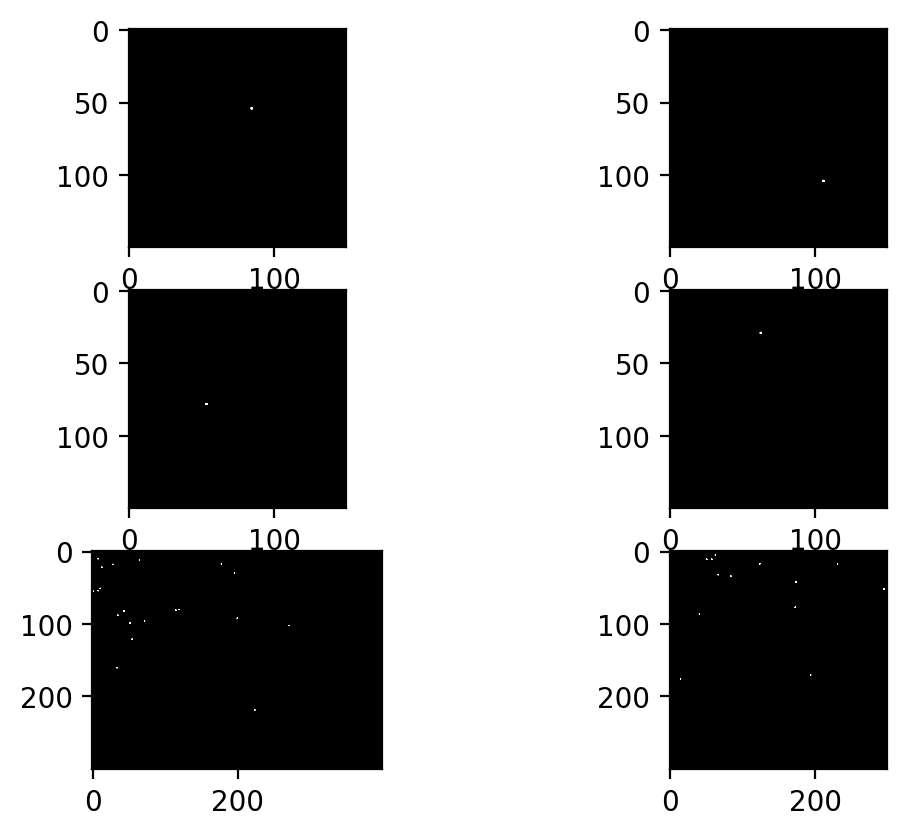

In [10]:
# Adjust threshold so that features are bright.
threshold = 0.0001

# Plot six regions of interest.
fig, ax = plt.subplots(3,2, dpi=200)
ax[0,0].imshow(frame[600:750, 350:500], vmax=threshold)
ax[0,1].imshow(frame[600:750, 1050:1200], vmax=threshold)
ax[1,0].imshow(frame[450:600, 1450:1600], vmax=threshold)
ax[1,1].imshow(frame[150:300, 650:800], vmax=threshold)
ax[2,0].imshow(frame[100:400, 300:700], vmax=threshold)
ax[2,1].imshow(frame[400:700, 0:300], vmax=threshold)

-----

# Your Turn

The top four images are probably stars.  The bottom two images came from regions near the upper left corner of the rectangle.  What do you think these images are?

I think they are likely the sides of the lens concentrating more light into the image, creating extra artifacts visible to the image

-----

## Gaussian Filter

A shortcoming of the square filter is that any bright pixels in a region make a large area of the convolution bright.  This makes it hard to distinguish the signal (stars) from the noise (stray light from the moon's glow).

A "gaussian" filter — one that is shaped like a bell curve — can help with this.  It reveals the shape of what is in the bright regions better than the rectangular filter.

The cell below creates a gaussian filter and displays it.  Run the cell and instpect the output.

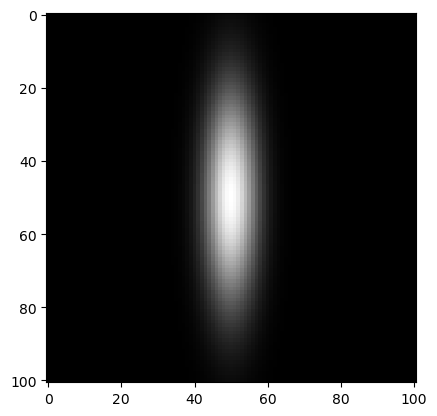

In [21]:
# Create a gaussian (bell curve) filter.
# Add up contributions from all the pixels in a box,
# but weighted by distance from the center,
# to try and separate the signal from the noise.

# Size of filter will be NxN.
N = 101

# This will be the center of the bell curve, in pixels.
x0 = 0
y0 = 0

# This will be the spread of the bell curve, in pixels.
dx = 5
dy = 20

# Get the pixel indices for the filter.
s = np.arange(N) - N//2

# Make 2D grids of x and y values.
X,Y = np.meshgrid(s,s)

# Make Z the bell curve filter.

# Create the filter.
gauss_filter = np.exp(-(X-x0)**2/2/dx**2 - (Y-y0)**2/2/dy**2)

plt.imshow(gauss_filter)

-----

## Your Turn

- Change the values of `x0` and `y0`.  What happens?
- Change the values of `dx` and `dy`.  What happens?
- If you replace each pixel by a weighted average of all the pixels in a  region around it using this filter, what do you think the resulting image will look like?

It's very similar to the last one when I change x0, y0, dx, and dy. The circle either moves or changes size. Because of this I believe that the same thing as before is going to happen when replace each pixel by a weighted average of pixels around it

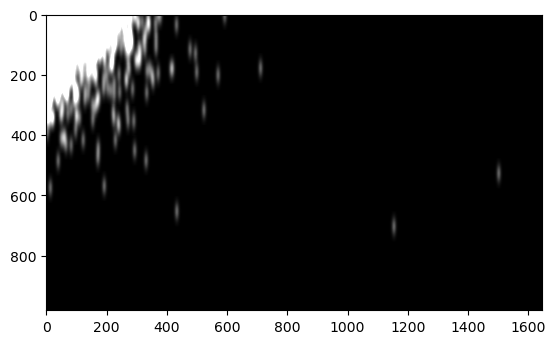

In [22]:
# Comment or delete the next line to run the cell.
#raise(NotSoFast)

# Apply the filter.
convolution = convolve(frame, gauss_filter, mode='same')

# View the filtered image.
threshold = 0.01
plt.imshow(convolution, vmax=threshold)
plt.gray()

# - Describe the image after convolution.
- How is the thing in the upper left different, compared with the rectangular filter?

It seems to be less spread out, more precise, and more pure white in the corner. It also seemed to have found more stars than before as well.

- Change the code above to make the spread of the gaussian filter larger, and then run the cells again.  What happens to the image?
- Change the code above to make the filter a long, skinny blob, and then run the cells again.  What happens to the image?

It seems to directly change the size of the splotches on the screen. The blob is very similar to the rectangles, just curved. Likely meaning more efficiently using the space.

- How many stars can you find in this region of the image?

It seems like ~9

# Try It!

Modify the code above to carry out a similar analysis of the upper left rectangle of the moon image.

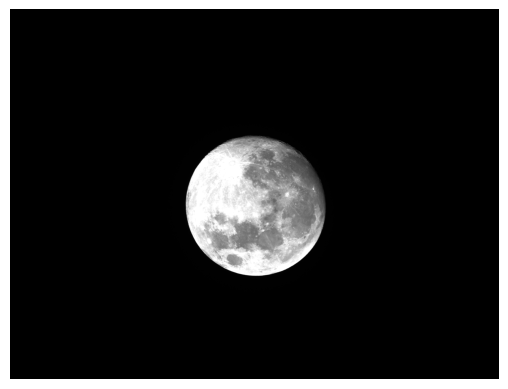

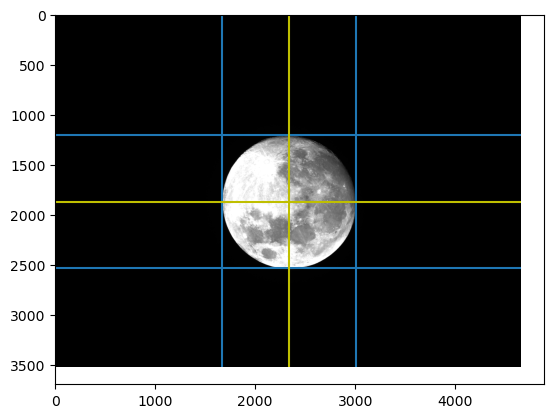

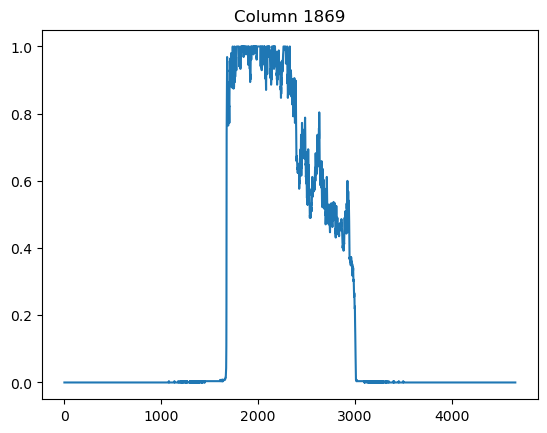

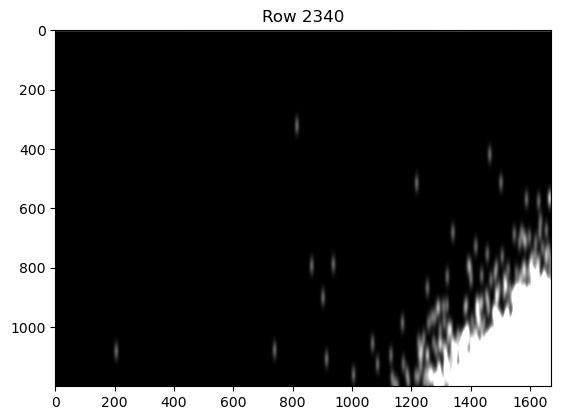

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import random as rng		# import random number generator
from scipy.signal import oaconvolve as convolve  # fast convolution function

# Set data directory for cat photo.
data_directory = "./"
file_name = "full-moon-10ms.PNG"

# Import the photograph using PyPlot.
photo = plt.imread(data_directory + file_name)

plt.figure()
plt.imshow(photo)
plt.gray()
plt.axis('off')

# Get the dimensions of the image.
Imax, Jmax = photo.shape

# Find bounding box for brightest pixels.
# Set a threshold for the edge of the moon.
threshhold = 0.1

# Use Boolean array: True for "moon pixels"
i_vals, j_vals = np.nonzero(photo > threshhold)

# Search indices for edges of the moon.
i_min = min(i_vals)
i_max = max(i_vals)
j_min = min(j_vals)
j_max = max(j_vals)

# Find the center of the moon.
i_mid = (i_min + i_max) // 2
j_mid = (j_min + j_max) // 2

# Plot the moon.
# Verify center and edges.
plt.figure()
plt.imshow(photo)
plt.gray()
plt.vlines([j_min, j_max], 0, Imax)
plt.hlines([i_min, i_max], 0, Jmax)
plt.hlines(i_mid, 0, Jmax, 'y')
plt.vlines(j_mid, 0, Imax, 'y')

# Plot a column of the image.
plt.figure()
plt.plot(photo[i_mid,:])
plt.title("Column %d" % i_mid)

# Plot a row of the image.
plt.figure()
plt.plot(photo[:,j_mid])
plt.title("Row %d" % j_mid)

# This will store a cropped image of the upper left rectangle in an array.
frame = photo[:i_min,:j_min]

plt.imshow(frame, vmax=0.001)
plt.gray()

# Size of filter will be NxN.
N = 101

# This will be the center of the bell curve, in pixels.
x0 = 0
y0 = 0

# This will be the spread of the bell curve, in pixels.
dx = 5
dy = 20

# Get the pixel indices for the filter.
s = np.arange(N) - N//2

# Make 2D grids of x and y values.
X,Y = np.meshgrid(s,s)

# Make Z the bell curve filter.

# Create the filter.
gauss_filter = np.exp(-(X-x0)**2/2/dx**2 - (Y-y0)**2/2/dy**2)

plt.imshow(gauss_filter)

# Comment or delete the next line to run the cell.
#raise(NotSoFast)

# Apply the filter.
convolution = convolve(frame, gauss_filter, mode='same')

# View the filtered image.
threshold = 0.01
plt.imshow(convolution, vmax=threshold)
plt.gray()



The syntax
```
array[10:20, 30:40]
```
creates a "slice" of the original array that contains rows 10 through 20 and columns 30 through 40.

Use your favorite filter to hunt for stars.  Adjust the indices in the cell below so that all six regions show some feature of interest.

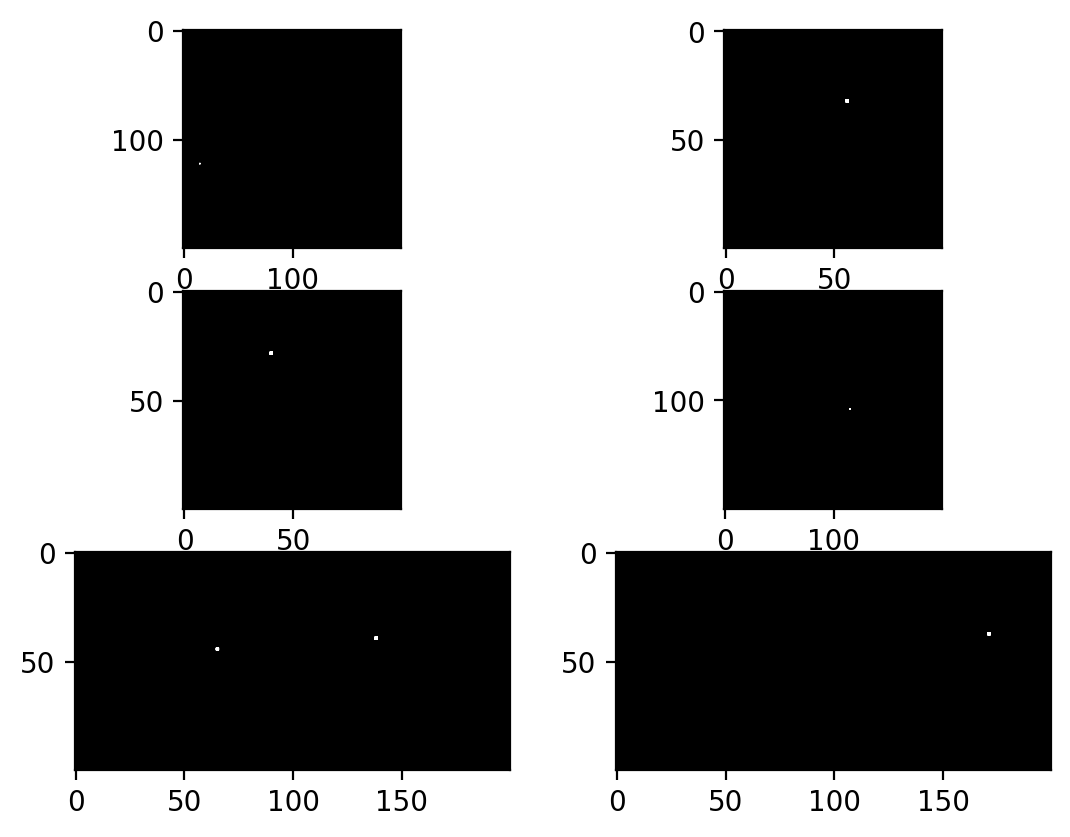

In [44]:
# Adjust threshold so that features are bright.
threshold = 0.0001

# Plot six regions of interest.
fig, ax = plt.subplots(3,2, dpi=200)
ax[0,0].imshow(frame[200:400, 800:1000], vmax=threshold)
ax[0,1].imshow(frame[1050:1150, 150:250], vmax=threshold)
ax[1,0].imshow(frame[1050:1150, 700:800], vmax=threshold)
ax[1,1].imshow(frame[1000:1200, 800:1000], vmax=threshold)
ax[2,0].imshow(frame[750:850, 800:1000], vmax=threshold)
ax[2,1].imshow(frame[950:1050, 1000:1200], vmax=threshold)

# Finding Edges

Though it may not matter for stars, sometimes it is useful to emphasize edges of objects in an image.  You are quite good at this, but how do you actually know what an edge is?  What information tells you where the edge of an object lies?

Filters and convolution can help us identify edges.

## Gradient Filter

One signature of an edge is that the brightness is changing rapidly.  We could try to look at the slope of the brightness.  The following filter will do that.

In [45]:
# Create a "gradient" filter.

grad_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

grad_y = np.array([
    [-1, -1, -1],
    [0,  0,  0 ],
    [1,  1,  1 ]
])

## Your Turn

Look at the elements of each filter.

- What is your best guess as to how each filter works?
- What do you think the moon image will look like when you apply each filter?

It looks like it weighs the x and the y seperately, sharpening the edges while dimming the centers. The moon would look like it has a corona then.

I was right :)


In [46]:
# raise(NotSoFast)

# Perform the convolution.
dmoon_dx = convolve(photo, grad_x, mode='same')
dmoon_dy = convolve(photo, grad_y, mode='same')

Text(0.5, 1.0, 'grad_y filter')

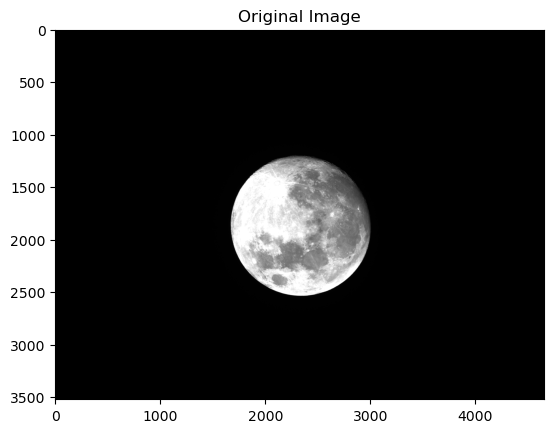

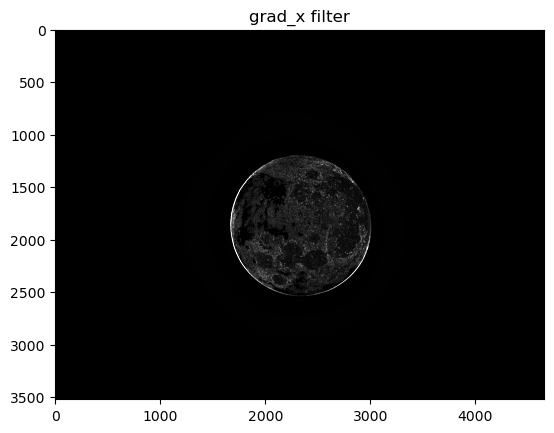

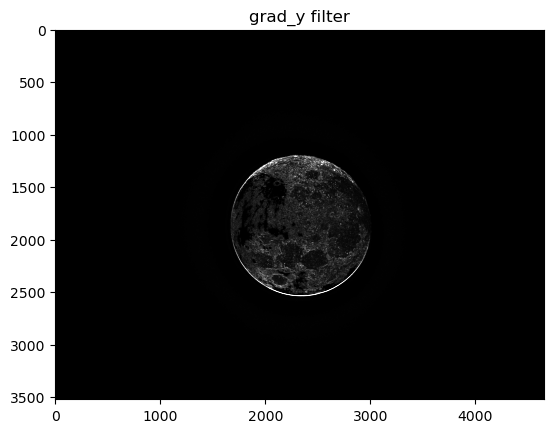

In [47]:
# Inspect the results.
plt.figure()
plt.imshow(photo)
plt.gray()
plt.title("Original Image")

# Plot the absolute value of the slope.
# Use a threshold to make regions of high slope stand out.
threshold = 0.5

plt.figure()
plt.imshow(abs(dmoon_dx), vmax=threshold)
plt.gray()
plt.title("grad_x filter")

plt.figure()
plt.imshow(abs(dmoon_dy), vmax=threshold)
plt.gray()
plt.title("grad_y filter")

- Do you think the gradient filter did well at emphasizing edges?
- What similarities do you see between the `grad_x` and `grad_y` filters?
- What differences do you see between the `grad_x` and `grad_y` filters?

I think the filter does a good job of emphasizing the edges. I notice it's ability to do the x direction is worse in the y and vice versa. Looking at the top and sides of the moon shows this. They are similar because they do the same thing, but they do it in different areas.

## Laplace Filter

The gradient requires that we specify a direction when computing derivatives.
 This might be ideal in some cases, but if we pick the "wrong" direction, we might miss some edges in the image.

 Another way to look for edges is to compute the ***curvature*** of the brightness — a measure of how rapidly the slope is changing.

 The filter below is called a "Laplace filter" because it computes the "laplacian" of the brightness at each pixel:
 $$\nabla^2 f = \dfrac{\partial^2 f}{\partial x^2} + \dfrac{\partial^2 f}{\partial y^2}$$
 This collection of second derivatives is independent of direction.

In [48]:
# Define the laplace filter.
laplace = np.array([
    [0, -1,  0],
    [-1, 4, -1],
    [0, -1,  0]
])

Think about what this filter might do.

- If all of the pixels in a region had the same value, what would this filter do?  E.g., if the pixels in a $3 \times 3$ region were all 1 (like matrix $P$ below), what would be the result of applying the laplace filter in matrix $L$ to the pixel in the center?

$$
P =
\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1
\end{bmatrix}
\qquad
L =
\begin{bmatrix}
    0 & -1 & 0 \\
    -1 & 4 & -1 \\
    0 & -1 & 0
\end{bmatrix}
$$

- What if the pixel values were increasing, as in matrix $Q$?

$$
Q =
\begin{bmatrix}
    1 & 2 & 3 \\
    1 & 2 & 3 \\
    1 & 2 & 3
\end{bmatrix}
$$

- What pixel values would give a large value upon convolution with $L$?  What would this look like?

In uniform areas, the laplace transform would do no changes.

If they were increasing, it would likely change the values continuing on to the right (where it's increasing here)

If the center pixel was brighter than the edges, that would make a large L. Like the sun being a dot in the picture

In [49]:
# raise(NotSoFast)

# Perform the convolution.
lap_moon = convolve(photo, laplace, mode='same')

Text(0.5, 1.0, 'laplace filter')

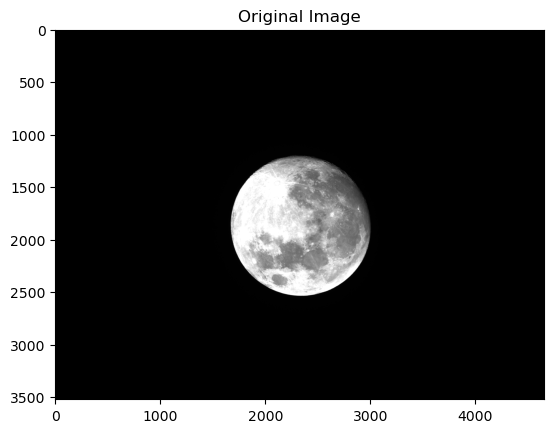

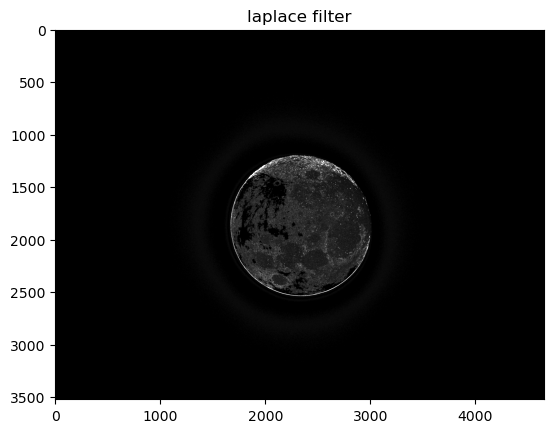

In [50]:
# Inspect the results.
plt.figure()
plt.imshow(photo)
plt.gray()
plt.title("Original Image")

# Plot the absolute value of the curvature.
# Use a threshold to make regions of high slope stand out.
threshold = 0.2

plt.figure()
plt.imshow(abs(lap_moon), vmax=threshold)
plt.gray()
plt.title("laplace filter")

- Describe the effect of this filter on the moon's image.
- How is the effect of the laplace filter similar to the gradient filters?
- How is the effect of the laplace filter different from the gradient filters?

This Laplace Transform does nearly the same thing as the gradient filters, but takes the guesswork of the direction out of it. This increases it's uniformity and gives a better result.

-----

# Further Exploration

## LoG Filter

You can enhance edges even more by combining filters.  One process uses a "laplace of gaussian" or LoG filter.

Combine the methods above to do the following:

1. Apply a gaussian filter to the moon image.
2. Apply a laplace filter to this image.
3. Display and describe the result.

Adjust the spread of the gaussian filter and the threshold to make the edge of the moon stand out as much as possible.

In [ ]:
# REPLACE WITH YOUR CODE.

***REPLACE WITH YOUR COMMENTS.***

## Double Gradient Filter

You can also apply the two gradient filters in sequence, to try to emphasize edges along both directions.  Do this.  Display and discuss the resulting image.

In [ ]:
# REPLACE WITH YOUR CODE.

***REPLACE WITH YOUR COMMENTS.***

## Sobel Filter

The Sobel filter is similar to a gradient filter.  Look it up.  Implement it.  Display and discuss the result of applying this to the moon.

In [ ]:
# REPLACE WITH YOUR CODE.

***REPLACE WITH YOUR COMMENTS.***

## Different Photographs

There are several pictures of the moon, with different exposures (5 ms, 10 ms, 20 ms, and 0.23 ms with gain).  Repeat the star search with another moon image.

- How does the exposure affect the analysis?
- Based on your work, what would be the optimal exposure for finding stars around a full moon?

In [ ]:
# REPLACE WITH YOUR CODE.

***REPLACE WITH YOUR COMMENTS.***